<a href="https://colab.research.google.com/github/binodsth2/Blood_Sugar_Detection_using_machine_Learning/blob/main/blood_level_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Initialize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import StandardScaler and MinMaxScaler individually from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler


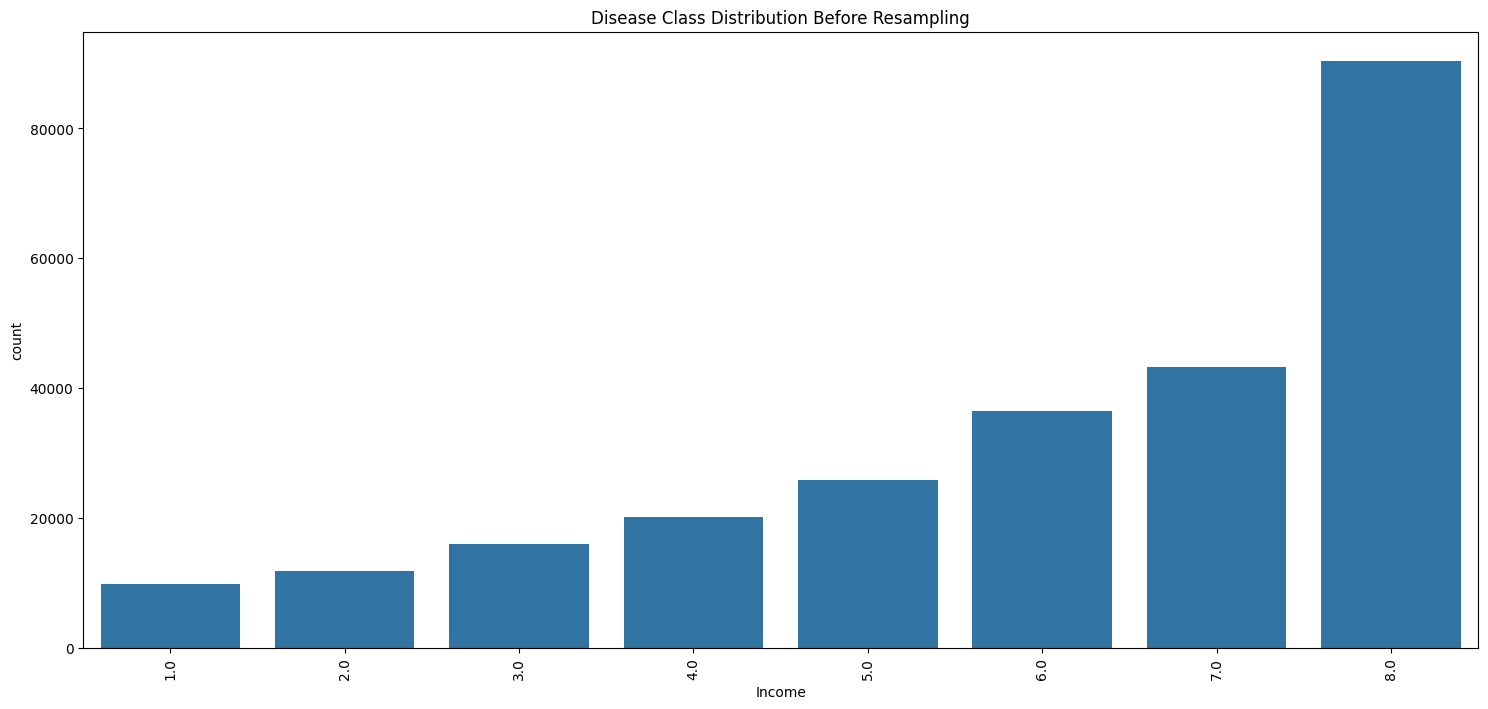

Resamples Class Distribution



,count
Income,
3.0,90385
1.0,90385
8.0,90385
6.0,90385
4.0,90385
7.0,90385
2.0,90385
5.0,90385


In [2]:
data=pd.read_csv('/content/drive/MyDrive/Machine_Learning/diabetes.csv')
# Call head() on the DataFrame object df
#df.head()
#df.info()
encoder=LabelEncoder()
# Use the 'data' DataFrame instead of 'df'
# data['Outcome']=encoder.fit_transform(data['Outcome'])
data.head()

X=data.iloc[:,:-1]
y=data.iloc[:,-1]

plt.figure(figsize=(18,8))
sns.countplot(x=y) # Use x instead of X for countplot
plt.title('Disease Class Distribution Before Resampling')
plt.xticks(rotation=90) # Corrected xtricks to xticks
plt.show()

ros=RandomOverSampler(random_state=42)
X_resampled,y_resampled=ros.fit_resample(X,y)

print('Resamples Class Distribution\n')
pd.Series(y_resampled).value_counts() # Corrected series to Series

# plt.figure(figsize=(18,8))
# sns.countplot(x=y_resampled) # Use x instead of X for countplot
# plt.title('Disease Class Distribution After Resampling')
# plt.xticks(rotation=90) # Corrected xtricks to xticks
# plt.show()

In [3]:
# Cross-Validation with Stratified K-fold
if 'gender' in X_resampled.columns:
    le = LabelEncoder()
    X_resampled['gender'] = le.fit_transform(X_resampled['gender'])
    X_resampled = X_resampled.fillna(0)

if len(y_resampled.shape) > 1:
        y_resampled = y_resampled.values.ravel()

models = {
    "Decision Tree": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
    #"Random Forest": RandomForestClassifier()
}

cv_scoring = 'accuracy'

#stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
  try:
    scores = cross_val_score(model, X_resampled, y_resampled, cv=stratified_kfold, scoring=cv_scoring, error_score='raise')
    print('='*50)
    print(f"Model:{model_name}")
    print(f"Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
  except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)

Model: Decision Tree failed with error:
name 'stratified_kfold' is not defined
Model: Naive Bayes failed with error:
name 'stratified_kfold' is not defined
Model: Support Vector Machine failed with error:
name 'stratified_kfold' is not defined


In [ ]:
#Training the individual model
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_resampled)
cf_matrix_sum = confussion_matrix(y_resampled, svm_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_sum, annot=True, fmt='d')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f"SVM ACCURACY: {accuracy_score(y_resampled,svm_preds)*100:.2f}%")